In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



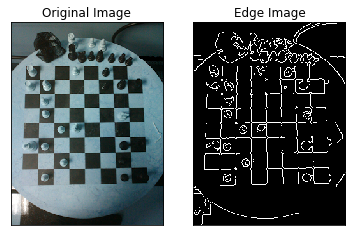

True

In [19]:
filename = "test_chess.png"
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
	# return the edged image
	return edged
# construct the argument parse and parse the arguments


# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread(filename)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = cv2.Canny(blurred, 10, 350)
tight = cv2.Canny(blurred, 225, 250)
auto = auto_canny(blurred)
	# show the images
#cv2.imshow("Original", image)
#cv2.imshow("Edges", np.hstack([wide, tight, auto]))
#cv2.waitKey(0)
plt.subplot(121),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(np.hstack([auto]),cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
edges = np.hstack([auto])
#edges = np.hstack([wide])
plt.show()
#cv2.imwrite("auto_edged_only_1.png" , np.hstack([auto]))
cv2.imwrite("auto_edged_only_2.png" , np.hstack([auto]))
cv2.imwrite("wide_edged_only_2.png" , np.hstack([wide]))



In [22]:
lines = cv2.HoughLines(edges,1,np.pi/180,80,16)
#lines = cv2.HoughLinesP(edges,1,np.pi/180,80,maxLineGap=100)
print("Line count "+str(len(lines)))
image = cv2.imread(filename)
full_lines = []
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        full_lines.append([x1, y1, x2, y2])
        cv2.line(image,(x1,y1),(x2,y2),(0,0,255),2)
terget_file = str("houghlines3"+filename)
print(terget_file)
print(full_lines)
cv2.imwrite(terget_file,image)

Line count 26
houghlines3test_chess.png
[[91, 1000, 91, -1000], [118, -1002, 153, 997], [94, -1001, 129, 997], [52, 1001, 87, -998], [-996, 225, 1003, 190], [-996, 201, 1003, 166], [144, -1005, 214, 993], [121, -1004, 190, 993], [-997, 177, 1002, 142], [-1000, 90, 999, 91], [-1000, 112, 999, 113], [-997, 154, 1002, 119], [28, 1000, 63, -999], [-1000, 134, 999, 135], [-1000, 157, 999, 158], [14, 1001, 83, -997], [124, -1007, 229, 989], [115, 1000, 115, -1000], [-995, 250, 1003, 215], [-998, 110, 1001, 75], [67, 1000, 67, -1000], [-1000, 68, 999, 69], [-1000, 181, 999, 182], [-1000, 205, 999, 206], [97, -1003, 166, 994], [71, -1001, 106, 998]]


True

In [23]:
import math
image1 = cv2.imread(filename)
def angle(line1, line2):
    x1, y1 = line1[0]
    x2, y2 = line1[1]    
    if((x2-x1) == 0):
        Slope1 = (y2-y1)/1
    else:    
        Slope1 = (y2-y1)/(x2-x1)
    x1, y1 = line2[0]
    x2, y2 = line2[1]    
    if((x2-x1) == 0):
        Slope2 = (y2-y1)/1
    else:    
        Slope2 = (y2-y1)/(x2-x1)
    if(Slope1*Slope2 == -1):
        Tangent_of_Angle = (Slope2 - Slope1) / 1
    else:    
        Tangent_of_Angle = (Slope2 - Slope1) / (1+  Slope1*Slope2)
    #m1 = (pt1.getY() - pt1.getY())/1
    #m2 = (pt2.getY() - pt1.getY())/(pt2.getX()-pt1.getX())

    #tnAngle = (m1-m2)/(1+(m1*m2))
    return math.atan(Tangent_of_Angle)

def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])
    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]
    ang1 = math.degrees(angle(line1, line2))
    print(ang1)
    #ang1 = ang1 * (-1)
    #ang2 = math.degrees(angle(line1, line2[1]))
    #ang2 = ang2 * (-1)
    #print("lane1:"+str(ang1)+" | lane2:"+str(ang2)+" | diff :"+str(  abs(ang1 - ang2)))
    angle_between = abs(ang1)
    div=0
    if(angle_between >80 and angle_between< 100):
        div = det(xdiff, ydiff)
    if div != 0:
       #raise Exception('lines do not intersect')

        d = (det(*line1), det(*line2))
        x = det(d, xdiff) / div
        y = det(d, ydiff) / div
    else:
        x,y =[0,0]
    return int(x), int(y)
intercept_list = []
for i in range(0, len(full_lines)-1):
#for i in range(0, 1):
#for line in full_lines:
    print(full_lines[i])
    x1, y1, x2, y2 = full_lines[i]
    A = (x1, y1)
    B = (x2, y2)
    cv2.line(image1, A, B, (0, 255, 0), 2,cv2.LINE_AA)
    for j in range(i+1, len(full_lines)):
        x11, y11, x12, y12 = full_lines[j]
        print(str(j) + str(full_lines[j]))
        C = (x11, y11)
        D = (x12, y12)
        inter_p = line_intersection((A, B), (C, D))
        #print(inter_p)
        if(inter_p[0] !=0 or inter_p[0] !=0):         
            #cv2.line(image1, C, D, (0, 0, 255), 2,cv2.LINE_AA)
            #cv2.circle(image1, inter_p, 3, (255, 0, 0), -1)
            intercept_list.append(inter_p )
terget_file = str("santhu_DOT"+filename)
print(len(intercept_list))

for inter_p in intercept_list :
    #if(inter_p[0] !=0 or inter_p[0] !=0):         
    #cv2.line(image1, C, D, (0, 0, 255), 2,cv2.LINE_AA)
    cv2.circle(image1, inter_p, 3, (255, 0, 0), -1)
cv2.imwrite(terget_file,image1)

[91, 1000, 91, -1000]
1[118, -1002, 153, 997]
-1.031723126353081
(0, 0)
2[94, -1001, 129, 997]
-1.0322250633601415
(0, 0)
3[52, 1001, 87, -998]
0.9744273516146462
(0, 0)
4[-996, 225, 1003, 190]
88.96827687364693
(91, 205)
5[-996, 201, 1003, 166]
88.96827687364693
(91, 181)
6[144, -1005, 214, 993]
-2.0351868206544954
(0, 0)
7[121, -1004, 190, 993]
-2.0075345580023023
(0, 0)
8[-997, 177, 1002, 142]
88.96827687364693
(91, 157)
9[-1000, 90, 999, 91]
-89.99998566889316
(91, 90)
10[-1000, 112, 999, 113]
-89.99998566889316
(91, 112)
11[-997, 154, 1002, 119]
88.96827687364693
(91, 134)
12[28, 1000, 63, -999]
0.9744273516146462
(0, 0)
13[-1000, 134, 999, 135]
-89.99998566889316
(91, 134)
14[-1000, 157, 999, 158]
-89.99998566889316
(91, 157)
15[14, 1001, 83, -997]
1.9492491363618052
(0, 0)
16[124, -1007, 229, 989]
-3.0399287576810416
(0, 0)
17[115, 1000, 115, -1000]
0.0
(0, 0)
18[-995, 250, 1003, 215]
88.96777493663986
(91, 230)
19[-998, 110, 1001, 75]
88.96827687364693
(91, 90)
20[67, 1000, 67,

True